<AxesSubplot:ylabel='Density'>

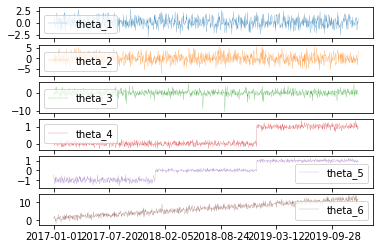

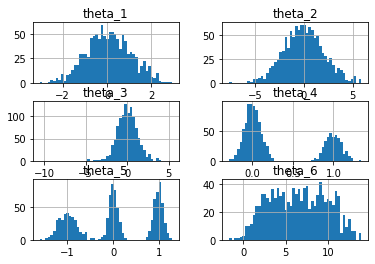

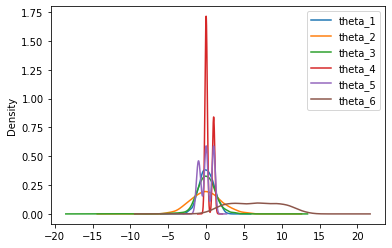

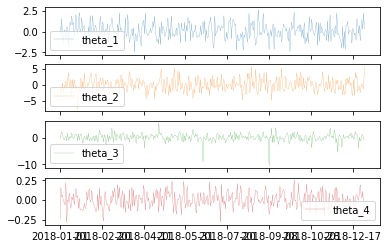

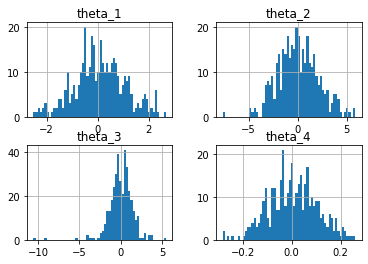

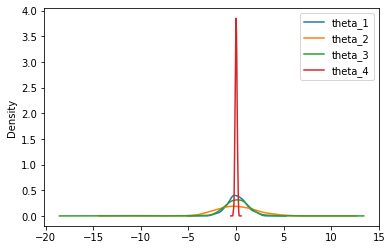

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
"""-------------------------Excercise 1-------------------------"""

#1 import data from the file & #2 set first column as the index
data_file = pd.read_csv('Data1.csv', index_col = 0)


#3 plot all columns as time series
columns = ['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6']
data_file[columns].plot(linewidth = 0.2, subplots = True)

#4 plot histograms of all columns
data_file.hist(bins = 50)

#5 plot Kernel Density Estimators (KDE) for all columns
data_file.plot.kde()

#6 repeat analysis for [theta_1, theta_4] columns in 2018
rows_2018 = data_file.loc['2018-01-01':'2018-12-31']
columns2 = ['theta_1', 'theta_2', 'theta_3', 'theta_4']
rows_2018[columns2].plot(linewidth = 0.2, subplots=True)

rows_2018[columns2].hist(bins = 60)

rows_2018[columns2].plot.kde()





INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



theta:  [0.436718 0.302387 0.197259 ... 0.518943 0.559925 0.239281]


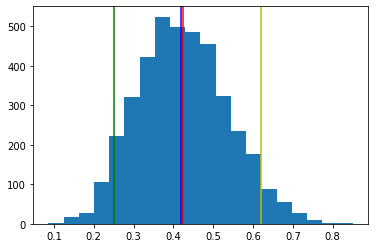

In [3]:
"""-------------------------Excercise 2-------------------------"""
#F=9, L=8, N=17

import os
from cmdstanpy import cmdstan_path, CmdStanModel
from random import sample

F = len('Katarzyna')
L = len('Wątorska')
N = F+L
y=np.random.choice([0, 1], size=(N,), p=[F/N, L/N])


#3. create a dataset
#dataset = {1: 0, 2:0, 3:1, 4:1, 5:0, 6:0, 7:1, 8:0, 9:1, 10:1, 11:0, 12:1, 13:0, 14:0, 15:1, 16:0, 17:1}
dataset1 = { "N" : 17, "y" : y }

#4 create model
#my_stan_file = os.path.join('.', 'bern_1.stan')
my_model = CmdStanModel(stan_file='bern_1.stan')

#5 sample the model
fit = my_model.sample(data=dataset1)


#6 extract theta & create histogram
theta = fit.stan_variable('theta')
print('theta: ', theta)

#7 get mean, median, 5%, 95% quantiles of theta
summary = fit.summary()
plt.hist(theta, bins=20)
plt.axvline(summary['5%']['theta'], color = 'g')
plt.axvline(summary['50%']['theta'], color = 'b')
plt.axvline(summary['95%']['theta'], color = 'y')
plt.axvline(theta.mean(), color='r')
plt.show()